# Task V: Quantum Graph Neural Network (QGNN)
In task II you already worked with a classical GNN.
- Describe a possibility for a QGNN circuit, which takes advantage of the graph representation of the data
- Implement and draw the circuit.
---

### Description of a QGNN Circuit Utilizing Graph Representation

This QGNN design leverages the graph structure by encoding node features and edge relationships into quantum states, enabling quantum algorithms to extract complex patterns.

**1. Node Feature Encoding:** The initial step involves encoding the classical features of each graph node into quantum states. This is achieved through angle encoding, where each feature is mapped to a rotation angle applied to a qubit. For a graph with N nodes, each node is represented by one qubit, and the node’s features determine the rotation applied to that qubit. Specifically, the code applies a  $$R_y$$ rotation to each qubit based on the node feature values. This ensures each node’s information is embedded in the quantum state.

**2. Graph Structure Encoding:** Edges, representing relationships between nodes, are encoded using entangling gates such as the CNOT (Controlled-NOT) gate. For each edge present in the graph (represented by the adjacency matrix), a CNOT gate is applied between the corresponding qubits. The CNOT gate creates entanglement between the qubits, facilitating information exchange between connected nodes, akin to message passing in classical GNNs.

**3. Parameterized Quantum Layers:** After encoding the graph, a parameterized quantum circuit (PQC) is applied. Here, we use a simple $$R_z$$ rotation to each qubit to allow the model to learn during training.

**4. Measurement:** Finally, a measurement is performed on each qubit to extract the quantum information. The results are obtained as a classical bitstring, which can then be processed to perform downstream tasks.

### Implementation

The code implements the QGNN circuit using Qiskit, a leading quantum computing framework.

*   **Graph and Node Feature Definition:** The adjacency matrix `adj_matrix` represents the connections between nodes, and `node_features` stores the feature values for each node.
*   **Circuit Construction:** The `QuantumCircuit` object is initialized with the appropriate number of qubits, and the steps outlined above are applied to create the QGNN circuit. The code then visualizes the quantum circuit using `qc.draw(output='text')`. This representation gives an overview of the operations and qubit interactions occurring within the circuit.
*   **Simulation:** The constructed circuit is simulated using Qiskit’s `Aer` simulator. The circuit is executed, and the measurement results are collected. Each measurement outcome is a bitstring, representing the final state of the qubits.
*   **Visualization of Measurement Results:** A bar plot of the measurement outcomes and their counts is generated using Matplotlib and Seaborn to summarize the simulation results.



In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a simple graph with 3 nodes and 2 edges
adj_matrix = np.array([
    [0, 1, 0],  # Node 1 connected to Node 2
    [1, 0, 1],  # Node 2 connected to Node 1 and Node 3
    [0, 1, 0]   # Node 3 connected to Node 2
])

# Node features
node_features = [0.5, -0.3, 0.8]

# Initialize a quantum circuit with 3 qubits (one for each node)
num_nodes = len(node_features)
qc = QuantumCircuit(num_nodes)

# Step 1: Encode node features into quantum states using rotation gates
for i in range(num_nodes):
    qc.ry(node_features[i] * np.pi, i)

# Step 2: Encode graph structure using entangling gates based on adjacency matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if adj_matrix[i][j] == 1:
            qc.cx(i, j)

# Step 3: Apply parameterized quantum circuit layers (simulating message passing)
for i in range(num_nodes):
    qc.rz(np.pi / 4, i)

# Step 4: Measurement
qc.measure_all()


## Circuit Diagram

In [ ]:

# Visualize the circuit
print("Quantum Graph Neural Network Circuit:")
print(qc.draw(output='text'))




Quantum Graph Neural Network Circuit:
         ┌─────────┐       ┌─────────┐            ░ ┌─┐      
   q_0: ─┤ Ry(π/2) ├────■──┤ Rz(π/4) ├────────────░─┤M├──────
        ┌┴─────────┴─┐┌─┴─┐└─────────┘┌─────────┐ ░ └╥┘┌─┐   
   q_1: ┤ Ry(-3π/10) ├┤ X ├─────■─────┤ Rz(π/4) ├─░──╫─┤M├───
        └┬──────────┬┘└───┘   ┌─┴─┐   ├─────────┤ ░  ║ └╥┘┌─┐
   q_2: ─┤ Ry(4π/5) ├─────────┤ X ├───┤ Rz(π/4) ├─░──╫──╫─┤M├
         └──────────┘         └───┘   └─────────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════╩══╩══╩═
                                                     0  1  2 



The attached image shows the output of our quantum graph neural network circuit, which implements the angle encoding and uses Ry and Rz rotation gates to perform the desired operations to the 3 qubits involved.



In [ ]:
# Simulate the circuit and get measurement results
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("\nMeasurement Results:")
print(counts)

# Convert counts to a format suitable for plotting
labels = list(counts.keys())
values = list(counts.values())



Measurement Results:
{'110': 14, '000': 43, '010': 113, '101': 100, '001': 15, '111': 33, '011': 343, '100': 363}


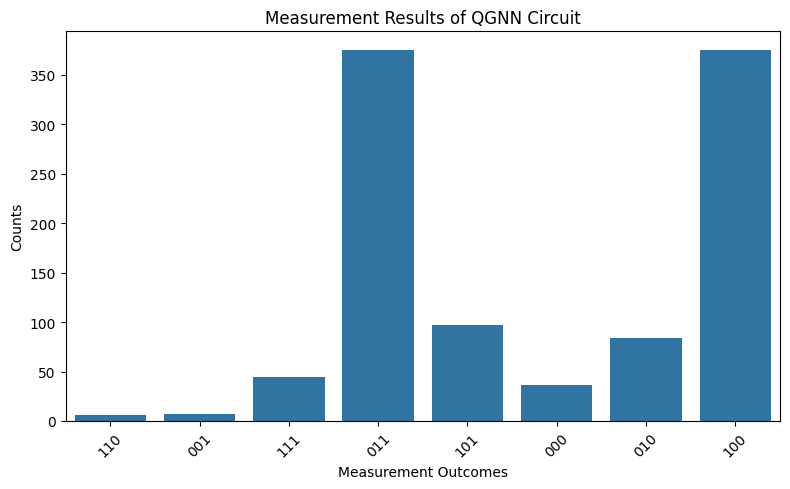

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values)

# Add title and labels
plt.title('Measurement Results of QGNN Circuit')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Conclusion

This task demonstrates the potential of combining quantum computing with graph neural networks. The QGNN circuit design effectively incorporates node features and graph structure into a quantum framework, enabling the extraction of complex relationships between nodes. By leveraging the principles of quantum mechanics, this approach opens doors to enhanced machine-learning tasks on graph-structured data.
